In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("london_weekends.csv")

In [3]:
data.shape[0]

5379

In [4]:
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5379 non-null   int64  
 1   realSum                     5379 non-null   float64
 2   room_type                   5379 non-null   object 
 3   room_shared                 5379 non-null   bool   
 4   room_private                5379 non-null   bool   
 5   person_capacity             5379 non-null   float64
 6   host_is_superhost           5379 non-null   bool   
 7   multi                       5379 non-null   int64  
 8   biz                         5379 non-null   int64  
 9   cleanliness_rating          5379 non-null   float64
 10  guest_satisfaction_overall  5379 non-null   float64
 11  bedrooms                    5379 non-null   int64  
 12  dist                        5379 non-null   float64
 13  metro_dist                  5379 

In [6]:
num_rows, num_columns = data.shape
print("Total number of records:", num_rows)
print("Total number of columns:", num_columns)

Total number of records: 5379
Total number of columns: 20


In [7]:
data.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5379.0,2689.000000,1552.927880,0.000000,1344.500000,2689.000000,4033.500000,5378.000000
realSum,5379.0,364.389747,437.742534,54.328653,174.510219,268.115431,438.274654,12937.275101
person_capacity,5379.0,2.857966,1.251068,2.000000,2.000000,2.000000,4.000000,6.000000
multi,5379.0,0.279792,0.448939,0.000000,0.000000,0.000000,1.000000,1.000000
biz,5379.0,0.357873,0.479419,0.000000,0.000000,0.000000,1.000000,1.000000
cleanliness_rating,5379.0,9.193902,1.151321,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,5379.0,90.921175,11.289857,20.000000,87.000000,94.000000,99.000000,100.000000
bedrooms,5379.0,1.133110,0.577676,0.000000,1.000000,1.000000,1.000000,8.000000
dist,5379.0,5.327620,2.705986,0.040561,3.545684,4.939138,6.838065,17.321199
metro_dist,5379.0,1.016534,1.265193,0.013875,0.324035,0.536131,1.090765,9.174094


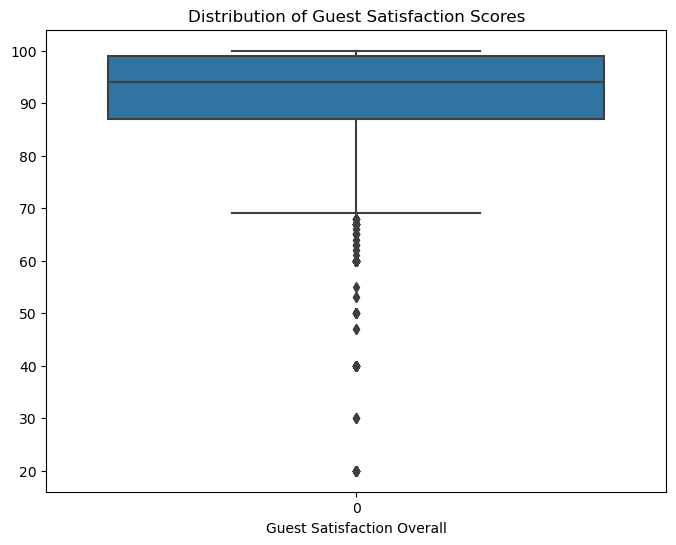

In [10]:
# Box Plot of 'guest_satisfaction_overall'
plt.figure(figsize=(8, 6))
sns.boxplot(data['guest_satisfaction_overall'])
plt.title('Distribution of Guest Satisfaction Scores')
plt.xlabel('Guest Satisfaction Overall')
plt.show()

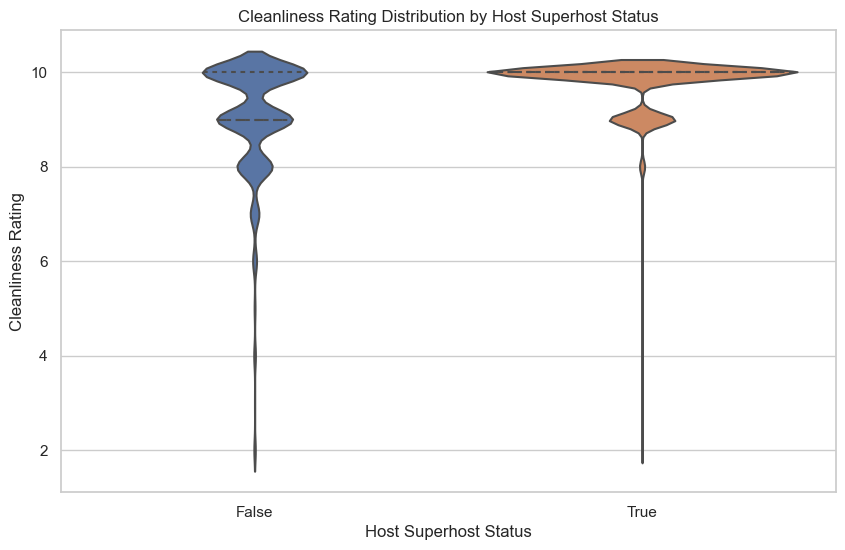

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(x='host_is_superhost', y='cleanliness_rating', data=data, inner="quartile")
plt.title('Cleanliness Rating Distribution by Host Superhost Status')
plt.xlabel('Host Superhost Status')
plt.ylabel('Cleanliness Rating')
plt.show()


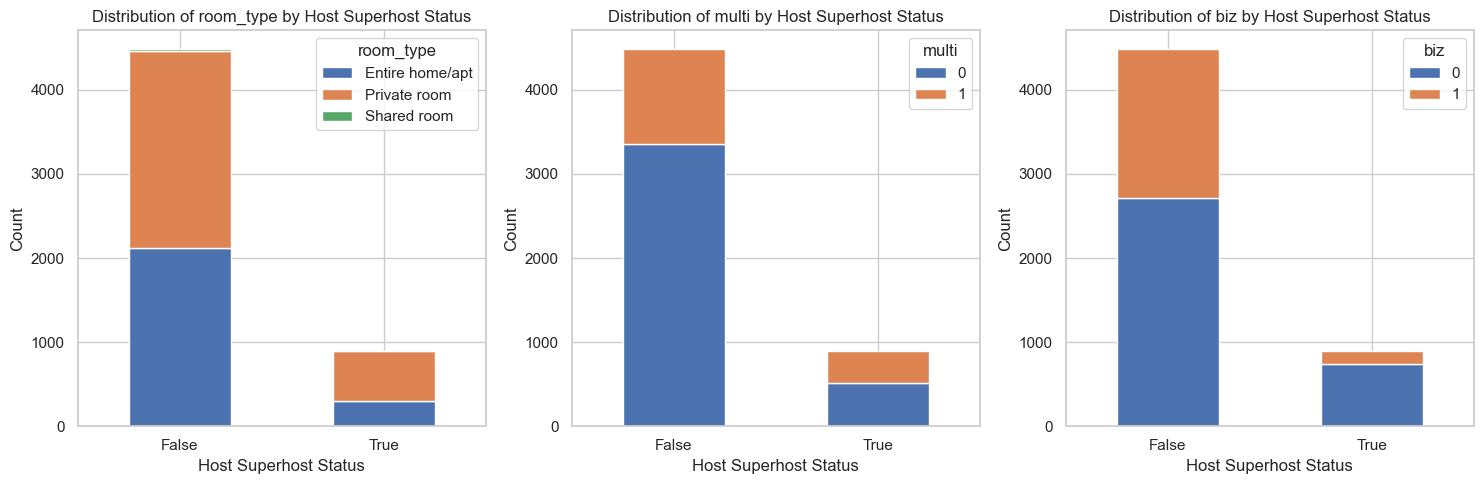

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


categorical_features = ['room_type', 'multi', 'biz'] 


num_plots = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5))


for i, feature in enumerate(categorical_features):
  
    grouped_data = data.groupby(['host_is_superhost', feature]).size().unstack()
    stacked_bar = grouped_data.plot(kind='bar', stacked=True, ax=axes[i], rot=0)
    stacked_bar.set_title(f'Distribution of {feature} by Host Superhost Status')
    stacked_bar.set_xlabel('Host Superhost Status')
    stacked_bar.set_ylabel('Count')
    stacked_bar.legend(title=feature, loc='upper right')

plt.tight_layout()
plt.show()


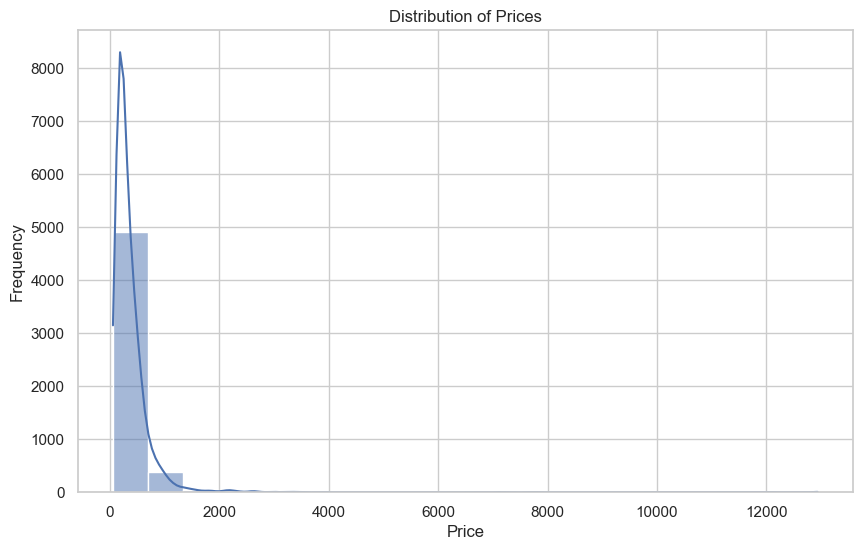

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['realSum'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

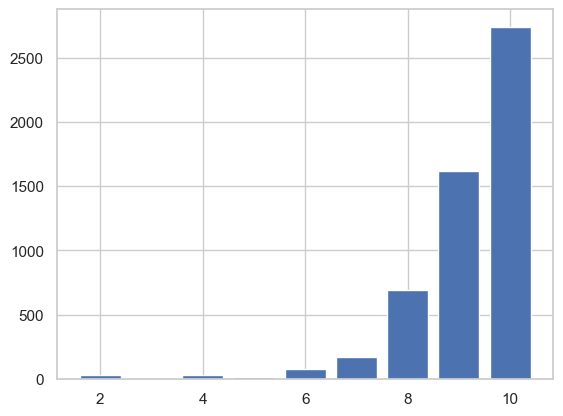

In [14]:
values_clean = data['cleanliness_rating'].unique()
num_clean = []
for val in values_clean:
    num_clean.append(data['cleanliness_rating'][data['cleanliness_rating']==val].count())

plt.bar(values_clean, num_clean)
plt.show()

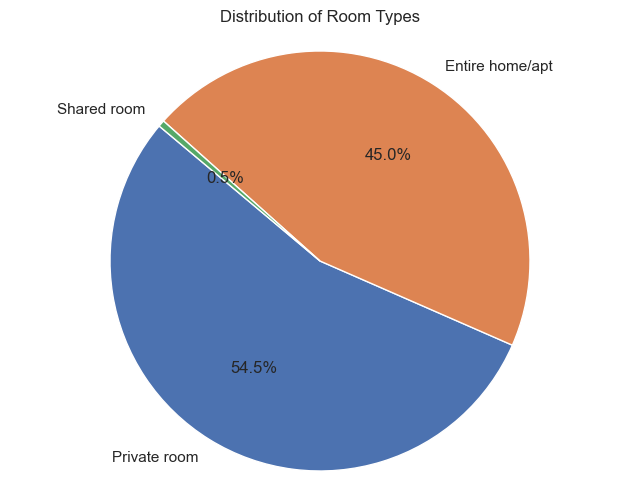

In [15]:
room_type_counts = data['room_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')  
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


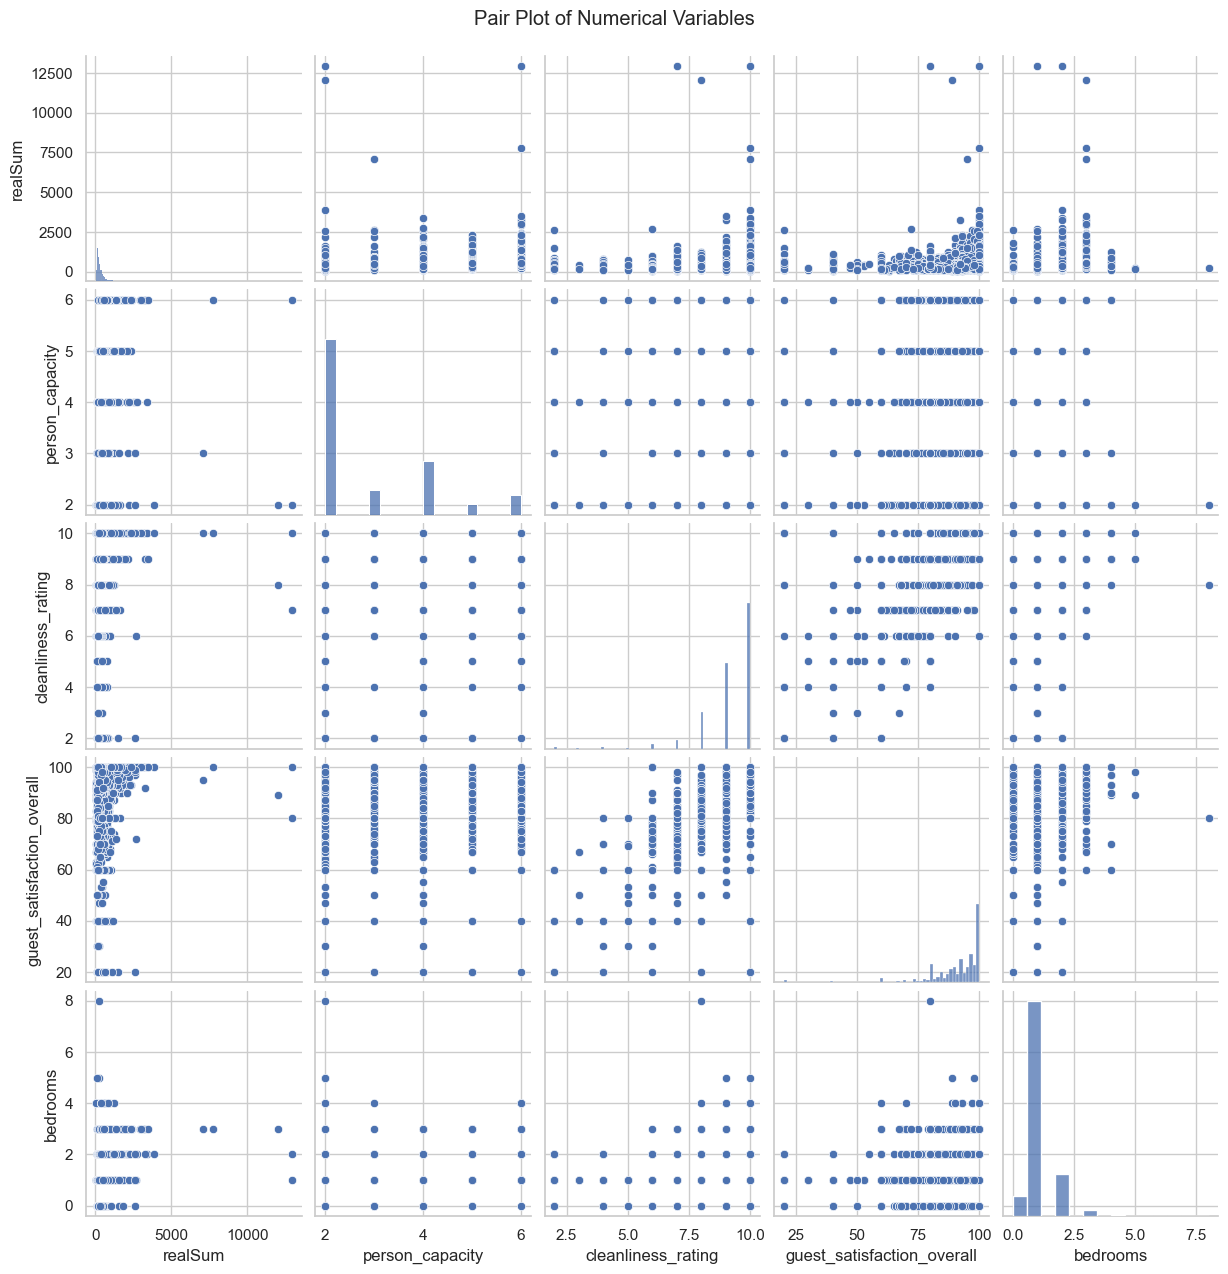

In [16]:
sns.pairplot(data[['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [17]:
import folium

# Create a map centered around the mean latitude and longitude
map_center = [data['lat'].mean(), data['lng'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each property
for index, row in data.iterrows():
    folium.Marker(location=[row['lat'], row['lng']], popup=row['realSum']).add_to(mymap)

# Display the map
mymap.save('properties_map.html')

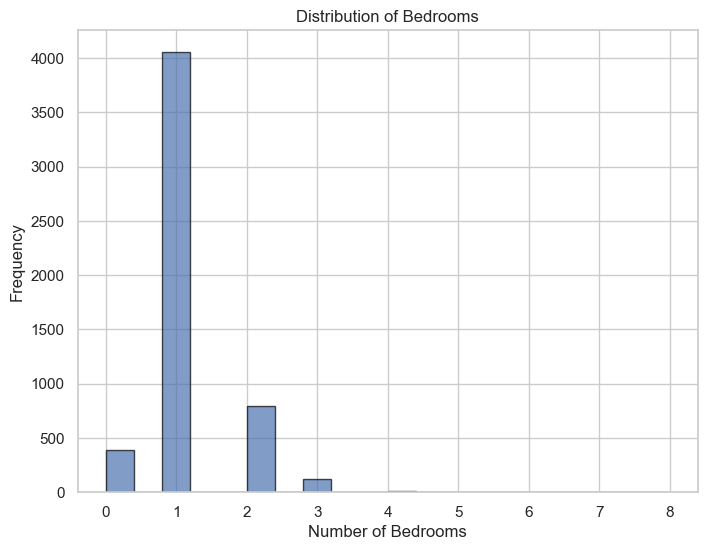

In [18]:
import matplotlib.pyplot as plt

# Create a histogram of bedrooms
plt.figure(figsize=(8, 6))
plt.hist(data['bedrooms'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

([<matplotlib.axis.XTick at 0x26b04abad50>,
 [Text(0, 0, 'Superhost'), Text(1, 0, 'non-superhost')])

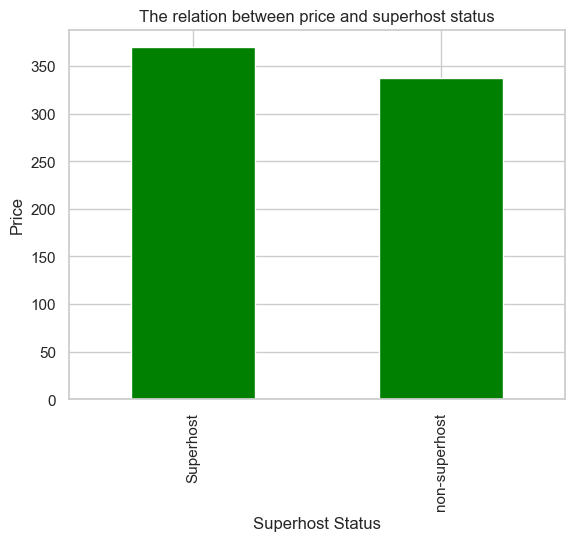

In [19]:
data.groupby(['host_is_superhost'])['realSum'].mean().sort_values(ascending=False).plot.bar(color='green')
plt.title('The relation between price and superhost status')
plt.ylabel('Price')
plt.xlabel('Superhost Status')
plt.xticks([0,1],['Superhost','non-superhost'])

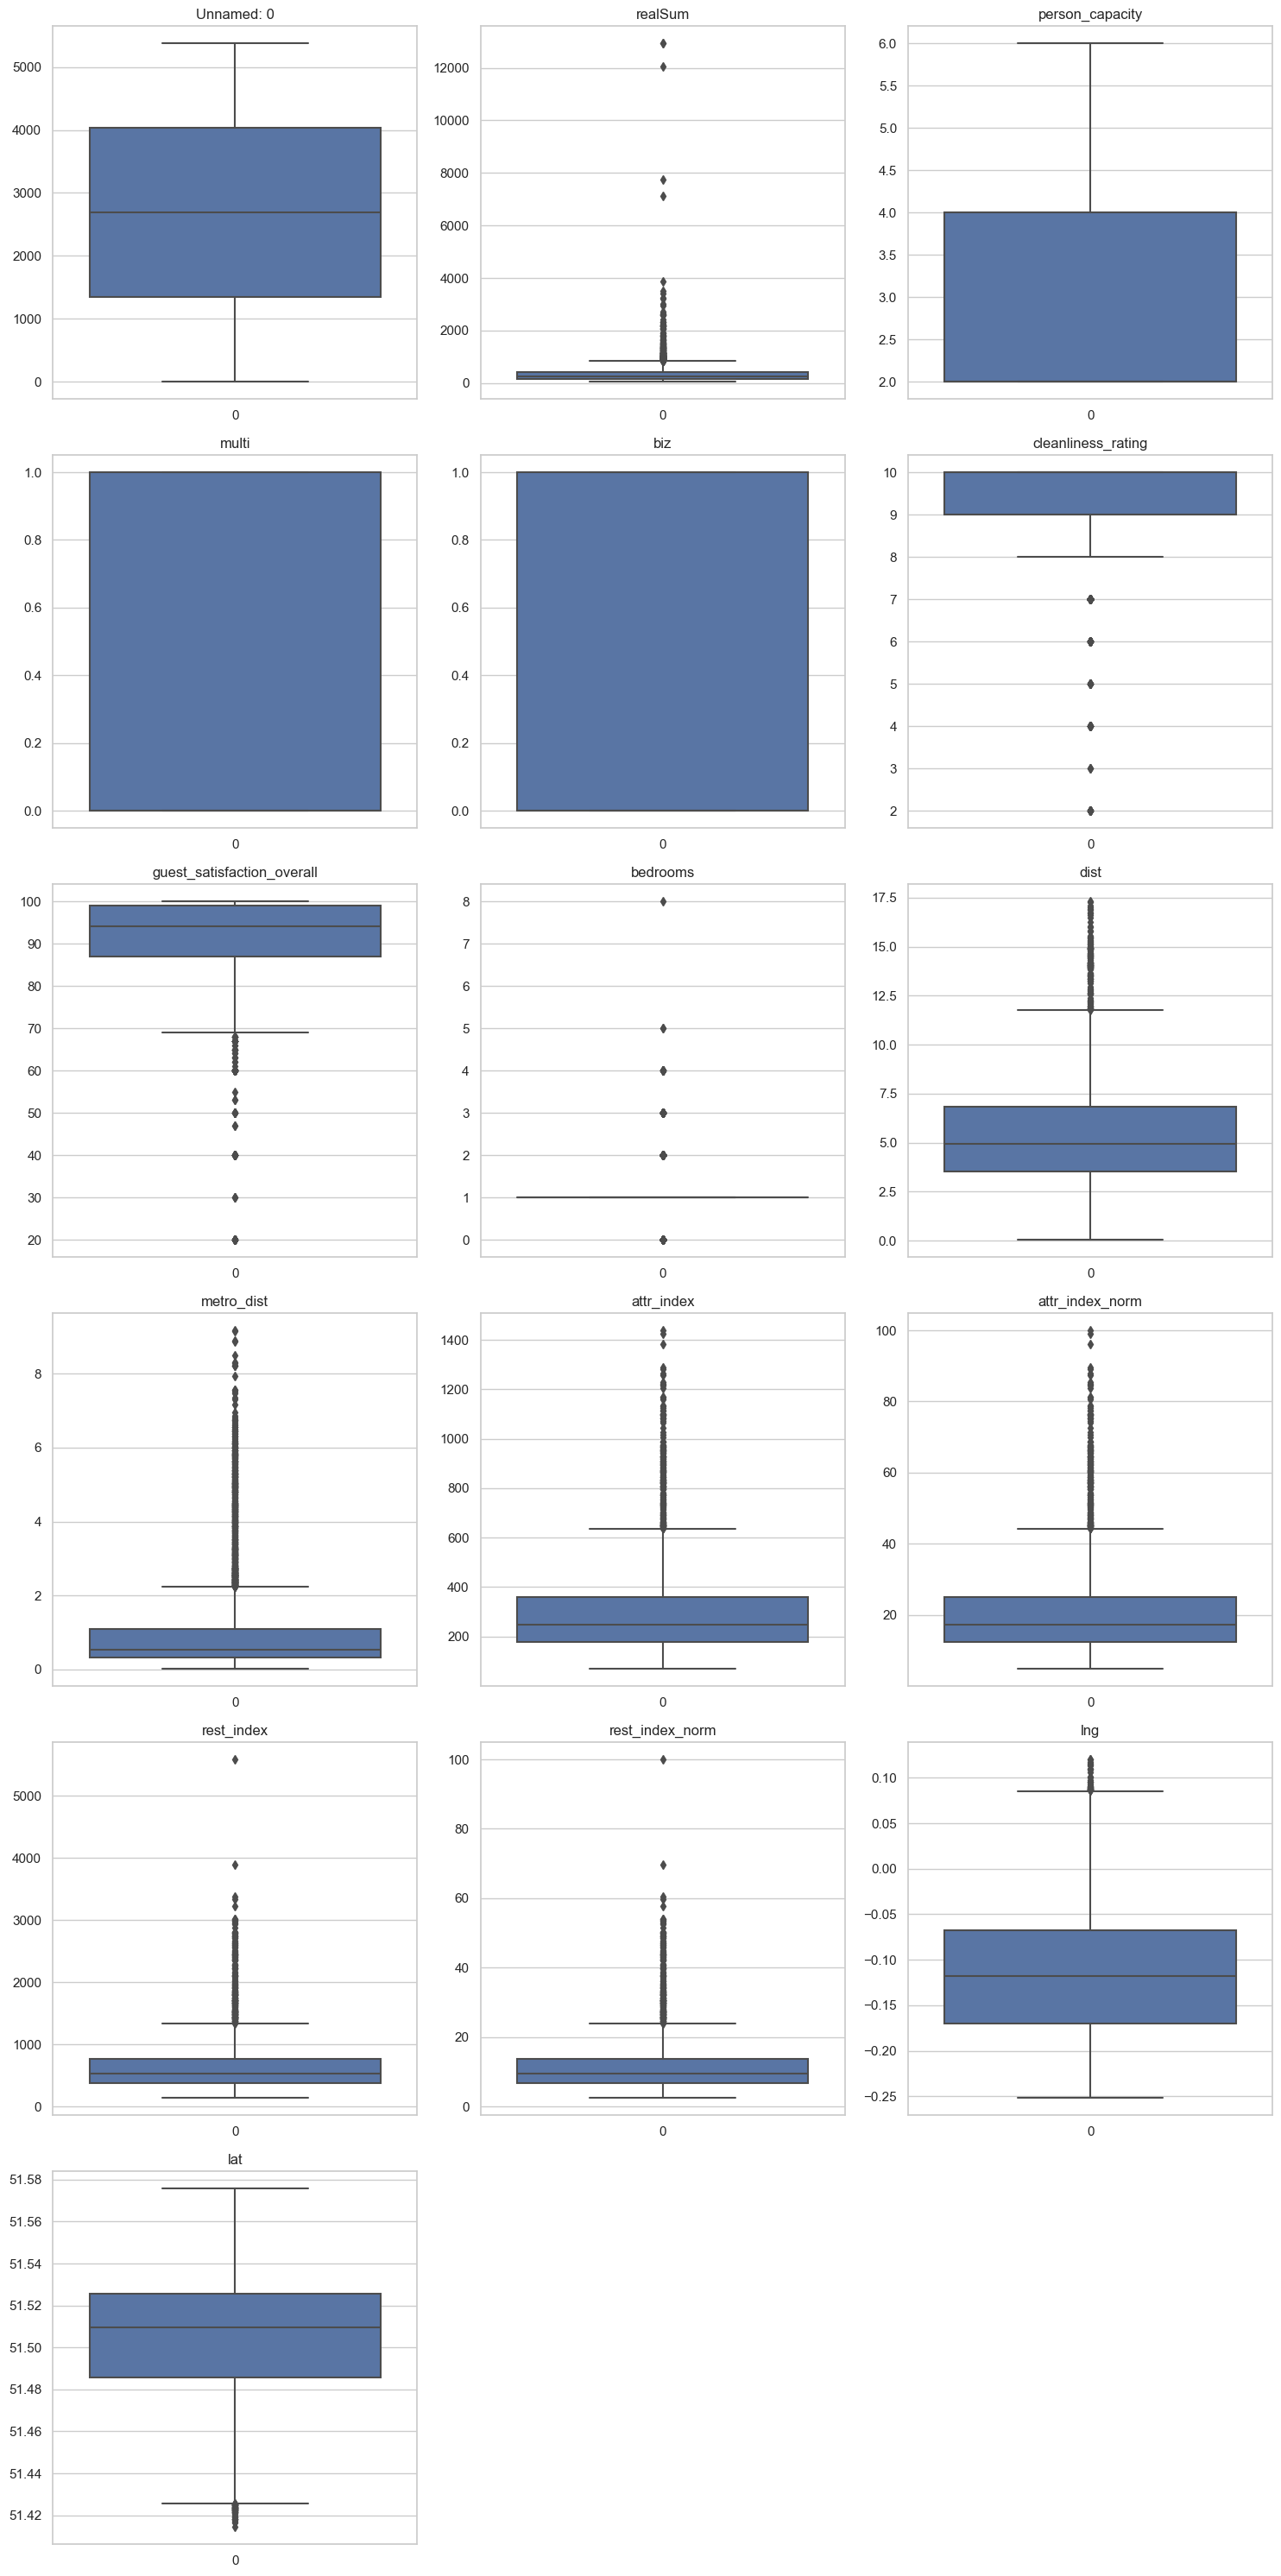

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'id']

num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)  

plt.figure(figsize=(15, 5*num_rows)) 
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i) 
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()